# Introduction

Price(t)=Price(t-1)*exp^r

where r is log returns of share price between yesterday and today.  Remember e^ln(x)=x
r=ln(Price(t)/Price(t-1)

Hence, Price(t)=Price(t-1)*exp^ln[Price(t)/price(t-1]

We have Price(t-1), dont know r as it is RV 

To model r, we use Brownian motion.

Brownnian motion uses a)drift and b) volatility of stock

drift is direction of rate of returns in the past.

Drift = (mu - 0.5 variance ) where mu is avr daily returns and negative sign since historical past values eroded in future.  Drift is the expected daily return of the stock

Volatility is RV and given by =sigma * Z where Z is random no. between 0 and 1 which is standard dev.


hence finally we can write, 

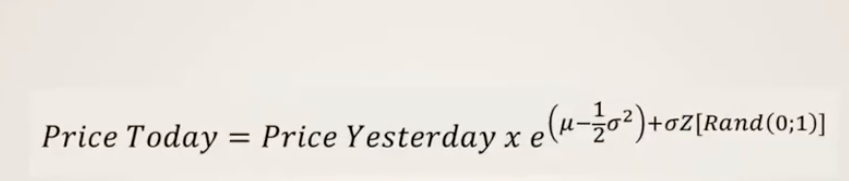

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from pandas_datareader import data as wb

import warnings
warnings.filterwarnings('ignore')

In [7]:
ticker = 'PG'
data = pd.DataFrame()

data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2010-06-01')['Adj Close']
data.head()


,PG
Date,
2010-06-01,44.745789
2010-06-02,45.170132
2010-06-03,45.214024
2010-06-04,44.482407
2010-06-07,44.350727


In [8]:
data.tail()

,PG
Date,
2020-06-15,116.690002
2020-06-16,118.129997
2020-06-17,117.930000
2020-06-18,119.279999
2020-06-19,119.010002


In [11]:
#ln(Pt/P0)=ln(1+r) where r is percentage change

log_returns = np.log(1+ data.pct_change())
log_returns

,PG
Date,
2010-06-01,NaN
2010-06-02,0.009439
2010-06-03,0.000971
2010-06-04,-0.016314
2010-06-07,-0.002965
...,...
2020-06-15,0.009212
2020-06-16,0.012265
2020-06-17,-0.001694


In [15]:
simple_returns1= data/data.shift(1)
simple_returns1

,PG
Date,
2010-06-01,NaN
2010-06-02,1.009483
2010-06-03,1.000972
2010-06-04,0.983819
2010-06-07,0.997040
...,...
2020-06-15,1.009254
2020-06-16,1.012340
2020-06-17,0.998307


In [16]:
log_returns.tail()

,PG
Date,
2020-06-15,0.009212
2020-06-16,0.012265
2020-06-17,-0.001694
2020-06-18,0.011382
2020-06-19,-0.002266


<Figure size 720x720 with 0 Axes>

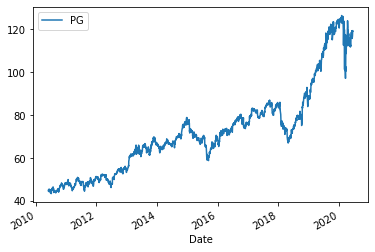

In [18]:
#plot of price of PG
plt.figure(figsize=(10,10))
data.plot()#normally distributed

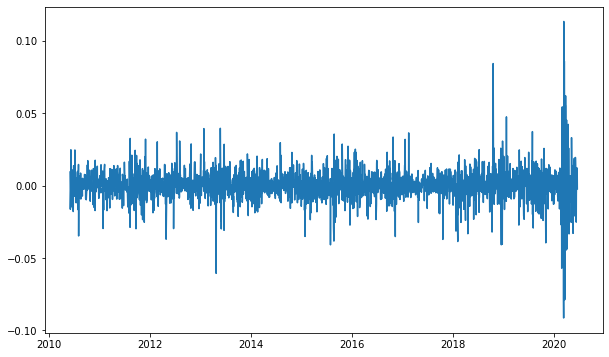

In [19]:
#plot of log_returns of PG
plt.figure(figsize=(10,6));
plt.plot(log_returns)
plt.show()

In [21]:
u = log_returns.mean()
u

PG    0.000386
dtype: float64

In [23]:
var = log_returns.var()
var

PG    0.00012
dtype: float64

In [24]:
#drift = (u - 0.5 * var)
drift = (u - 0.5 * var)
drift

PG    0.000327
dtype: float64

In [27]:
stdev = log_returns.std()
stdev

PG    0.010953
dtype: float64

# 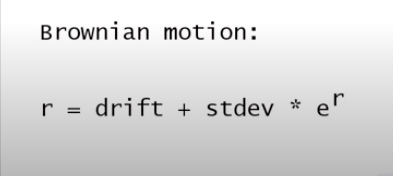


In [28]:
type(drift)

pandas.core.series.Series

In [29]:
type(stdev)

pandas.core.series.Series

In [31]:
#convert pandas series to array
np.array(drift)




array([0.00032651])

In [33]:
#or
drift.values

array([0.00032651])

In [34]:
stdev.values

array([0.01095261])

In [35]:
#Z corrosponds to no. of standard dev from mean

norm.ppf(0.95)#1.64 stdev contains 95% CI.

1.6448536269514722

In [38]:
x=np.random.rand(10,2)
x


array([[0.95246097, 0.67103966],
       [0.75598595, 0.17342529],
       [0.40307205, 0.53936958],
       [0.64069258, 0.26414379],
       [0.75582721, 0.13189089],
       [0.60465214, 0.06225158],
       [0.86537246, 0.87635367],
       [0.87633577, 0.96064793],
       [0.14569903, 0.9867237 ],
       [0.00264461, 0.29068337]])

In [40]:
x.shape

(10, 2)

In [44]:
#corrosponding Z values of above

Z = norm.ppf(x)
Z

array([[ 1.66919841,  0.44278578],
       [ 0.69344857, -0.94071567],
       [-0.2454034 ,  0.09884562],
       [ 0.36031065, -0.63062221],
       [ 0.69294258, -1.11749726],
       [ 0.26540729, -1.53614364],
       [ 1.10477964,  1.15695032],
       [ 1.15686269,  1.75825491],
       [-1.0550596 ,  2.21803282],
       [-2.78887075, -0.55138943]])

In [45]:
Z.shape

(10, 2)

In [50]:
#we will stimulate for 1000 future time periods and want to get 10 possible future price 

t_intervals = 1000
iterations = 10




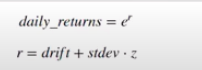

In [51]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)) )
daily_returns

array([[1.01360501, 0.99094876, 1.02040517, ..., 1.01694585, 1.00626904,
        1.01264088],
       [0.98963222, 0.99977721, 1.00482932, ..., 0.99967286, 0.99175599,
        0.99698378],
       [1.00068686, 1.00219338, 1.01443735, ..., 0.99123569, 1.02429394,
        1.01017238],
       ...,
       [0.98548046, 0.99360084, 0.99879638, ..., 0.99944803, 1.00524595,
        1.00119825],
       [1.00488937, 0.99715883, 1.00115806, ..., 1.02296987, 1.0094172 ,
        0.99093456],
       [1.00176578, 1.00896152, 1.00340233, ..., 1.00059926, 1.00032339,
        1.01055374]])

In [52]:
daily_returns.shape

(1000, 10)

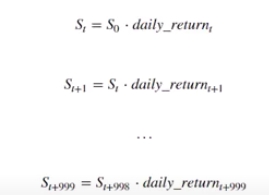

In [54]:
#we will take S0 as last price we have and predict for future 1000 time periods

S0=data.iloc[-1]
S0

PG    119.010002
Name: 2020-06-19 00:00:00, dtype: float64

In [55]:
data.tail()#verify

,PG
Date,
2020-06-15,116.690002
2020-06-16,118.129997
2020-06-17,117.930000
2020-06-18,119.279999
2020-06-19,119.010002


In [58]:
price_list = np.zeros_like(daily_returns)
price_list.shape

(1000, 10)

In [59]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
price_list[0]= S0
price_list

array([[119.01000214, 119.01000214, 119.01000214, ..., 119.01000214,
        119.01000214, 119.01000214],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

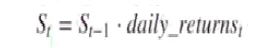

In [67]:
#for loop
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]* daily_returns[t]




In [68]:
price_list

array([[119.01000214, 119.01000214, 119.01000214, ..., 119.01000214,
        119.01000214, 119.01000214],
       [117.77613228, 118.98348785, 119.58474009, ..., 118.97106949,
        118.02888197, 118.65104233],
       [117.85702845, 119.2444644 , 121.31122712, ..., 117.92836969,
        120.89626858, 119.85800583],
       ...,
       [256.85991511,  90.8378438 , 111.77158214, ..., 168.76284227,
        223.86015715, 195.65264716],
       [258.11579711,  90.57975828, 111.90101979, ..., 172.63930347,
        225.96829215, 193.87896994],
       [258.57157233,  91.3914908 , 112.28174411, ..., 172.74275959,
        226.04136854, 195.92511768]])

In [69]:
price_list.shape

(1000, 10)

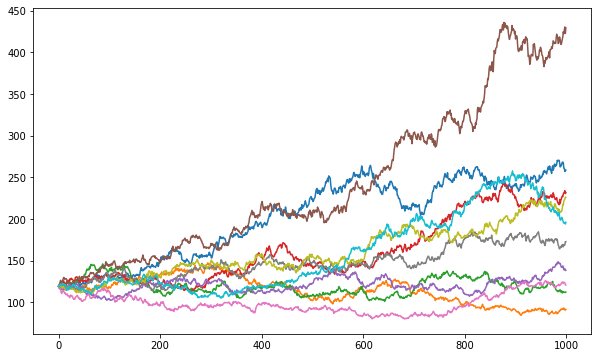

In [70]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()
#starting point is from S0

In [72]:
price_list.mean()

152.28537544105308